<a href="https://colab.research.google.com/github/satuelisa/NLPF/blob/main/NLPF_04_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('gutenbergr') # your own computer has this since Session 1
library(gutenbergr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘triebeard’, ‘urltools’, ‘lazyeval’




In [ ]:
mirror <- "http://mirrors.xmission.com/gutenberg/"
book <- gutenberg_download(25344, mirror = mirror) # this one is The Scarlet Letter by Nathaniel Hawthorne
head(book)

gutenberg_id,text
<int>,<chr>
25344,THE SCARLET LETTER.
25344,
25344,BY
25344,
25344,NATHANIEL HAWTHORNE.
25344,


How do we get the *n*-grams in R? (This is discussed in Chapter 4 of the R textbook.)

In [ ]:
library(dplyr)
install.packages("tidytext") # your computer already has this from previous sessions
library(tidytext)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘hunspell’, ‘janeaustenr’, ‘tokenizers’




In [ ]:
triplets <- book %>% unnest_tokens(trigram, text, token = "ngrams", n = 3) %>% filter(!is.na(trigram))
sample_n(triplets, 20) # some examples

gutenberg_id,trigram
<int>,<chr>
25344,these past seven
25344,there the neighborhood
25344,thy mother alone
25344,of the lord
25344,power so overfilling
25344,with mother and
25344,were a number
25344,nay more than
25344,that was committed


Do some of these occur repeatedly?

In [ ]:
head(triplets %>% count(trigram, sort = TRUE))

trigram,n
<chr>,<int>
the scarlet letter,67
the reverend mr,31
it may be,25
out of the,25
the custom house,24
there was a,24


Well, that first was to be expected, really. We can clean out triplets that contain stop words (like "out of the"), following what is done in Chapter 4 of the R textbook.

In [ ]:
library(tidyr)

separated <- triplets %>% separate(trigram, c("w1", "w2", "w3"), sep = " ")
filtered <- separated %>%
  filter(!w1 %in% stop_words$word) %>%
  filter(!w2 %in% stop_words$word) %>%
  filter(!w3 %in% stop_words$word)
counts <- filtered %>% count(w1, w2, w3, sort = TRUE)
counts %>% filter(n > 2) # we can get rid of the ones that occur just once or twice

w1,w2,w3,n
<chr>,<chr>,<chr>,<int>
answered,hester,prynne,7
spelling,normalized,changed,4
custom,house,officer,3
custom,house,steps,3
mossy,tree,trunk,3
thee,answered,hester,3
thou,wilt,love,3
typo,fixed,changed,3
wrinkled,scholar,glowed,3


The chapter also suggests an interesting representation for bigrams as a graph in which two words are connected by an edge if they appear in a bigram.

In [ ]:
install.packages("igraph") # this is new to Session 4
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [ ]:
edges <- book %>% unnest_tokens(bigram, text, token = "ngrams", n = 2) %>% filter(!is.na(bigram))
separated <- edges %>% separate(bigram, c("w1", "w2"), sep = " ")
filtered <- separated %>%
  filter(!w1 %in% stop_words$word) %>%
  filter(!w2 %in% stop_words$word)
counts <- filtered %>% count(w1, w2, sort = TRUE)
pairs <- counts %>% filter(n > 2)
head(pairs)

w1,w2,n
<chr>,<chr>,<int>
hester,prynne,127
scarlet,letter,87
roger,chillingworth,55
custom,house,42
wilt,thou,22
dost,thou,18


In [ ]:
g <- graph_from_data_frame(pairs) # https://igraph.org/r/doc/graph_from_data_frame.html (extra columns become edge attributes, they are not lost)
head(g)

   [[ suppressing 181 column names ‘hester’, ‘scarlet’, ‘roger’ ... ]]



6 x 181 sparse Matrix of class "dgCMatrix"
                                                                               
hester  . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . .
scarlet . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
roger   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
custom  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
wilt    . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . .
dost    . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                                                               
hester  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
scarlet . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
roger   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
custom  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 .

This would make for an excellent visualization. We need another package, though.

In [ ]:
install.packages("ggraph") # new to Session 4 (takes a bit of time to install)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’




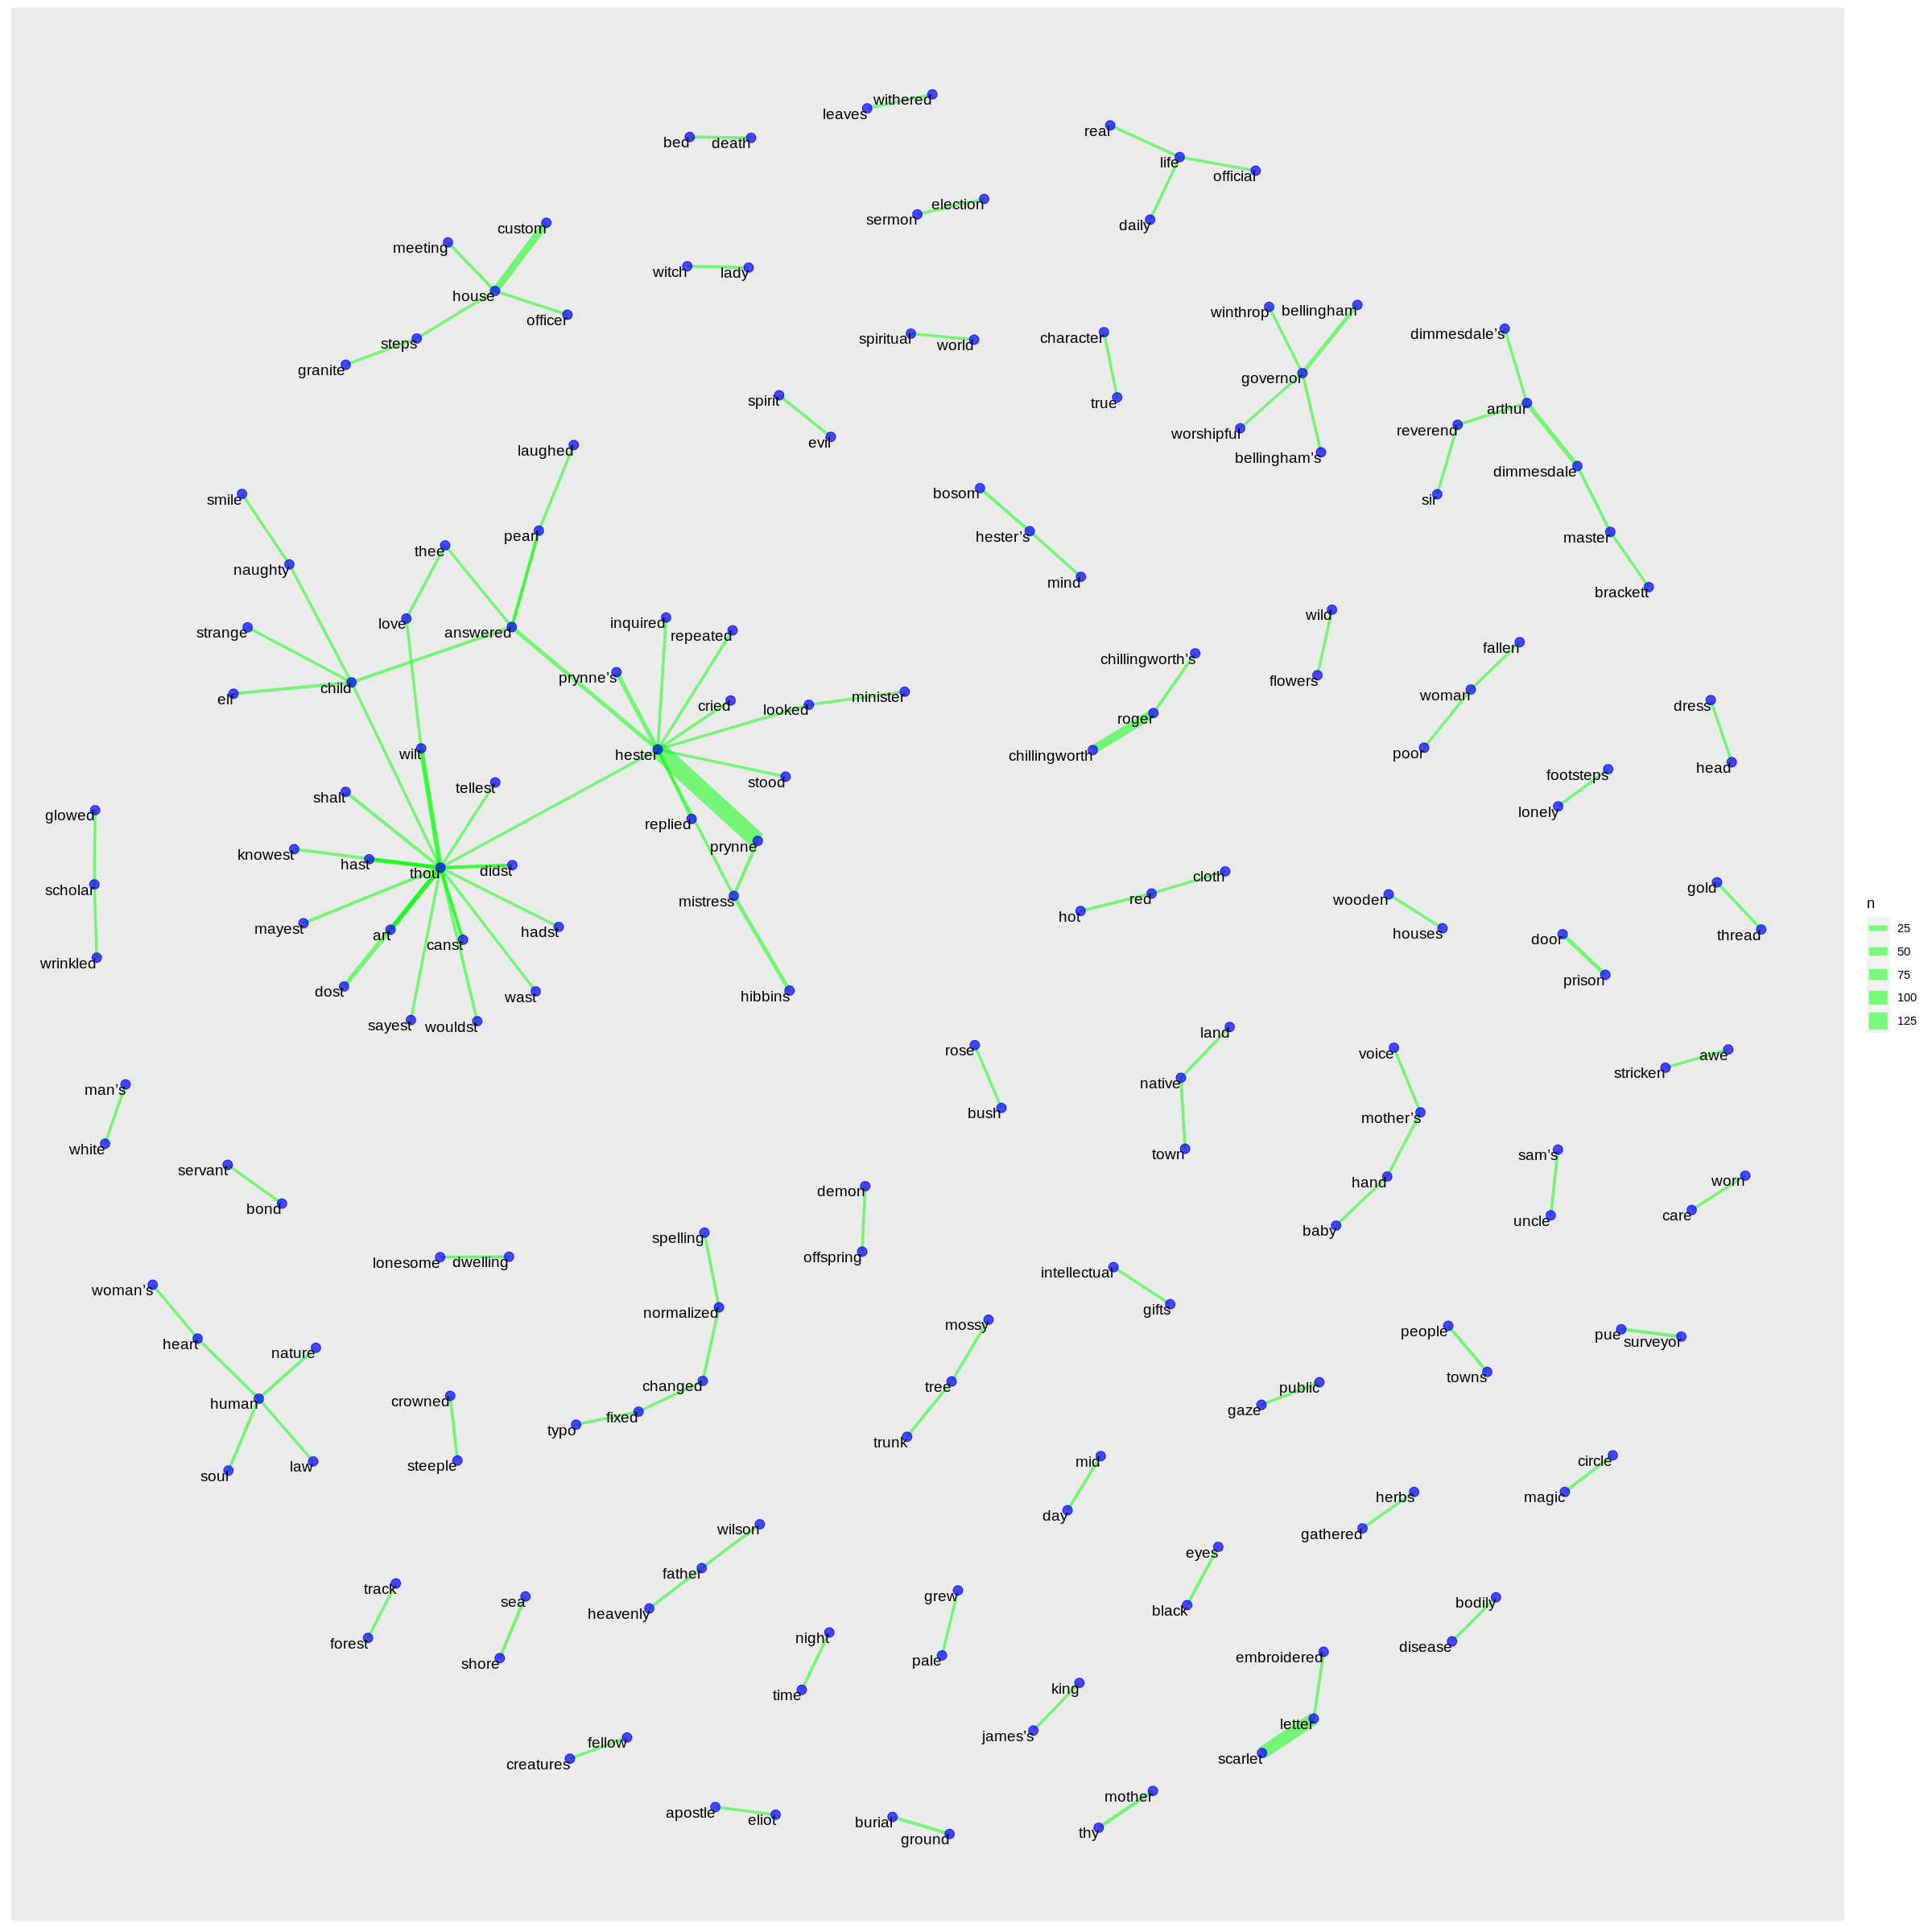

In [ ]:
library(ggraph)
library(repr)
options(repr.plot.width = 20, repr.plot.height = 20) 
ggraph(g, layout = "fr") + # Fruchterman-Reingold layout algorithm (spring-force)
  geom_edge_link(alpha = 0.5, aes(width = n), color = "green") + # draw edges
  geom_node_point(alpha = 0.7, color = "blue", size = 3) +  # draw vertices
  geom_node_text(aes(label = name), vjust = 1, hjust = 1, size = 4) # add vertex labels

The subgraph coming from the corrections listed at the end is easy to spot: *spellling; normalized; changed; fixed; typo*.

Let's just get the largest connected component of the graph for a clearer view.

In [ ]:
components <- clusters(g, mode = "weak") # from igraph
gcc <- which.max(components$csize) # find the largest
members <- V(g)[components$membership == gcc] # find its vertices
closeup <- induced_subgraph(g, members) # also from igraph
closeup

IGRAPH 9ce8ad1 DN-- 37 45 -- 
+ attr: name (v/c), n (e/n)
+ edges from 9ce8ad1 (vertex names):
 [1] hester  ->thou     hester  ->prynne   hester  ->prynne’s hester  ->looked  
 [5] hester  ->stood    wilt    ->thou     wilt    ->love     dost    ->thou    
 [9] thou    ->wilt     thou    ->art      thou    ->hast     thou    ->didst   
[13] thou    ->canst    thou    ->shalt    thou    ->mayest   thou    ->knowest 
[17] thou    ->tellest  thou    ->wast     answered->hester   answered->pearl   
[21] mistress->hester   mistress->prynne   mistress->hibbins  art     ->thou    
[25] hast    ->thou     child   ->thou     child   ->answered elf     ->child   
[29] replied ->hester   wouldst ->thou     cried   ->hester   didst   ->thou    
+ ... omitted several edges

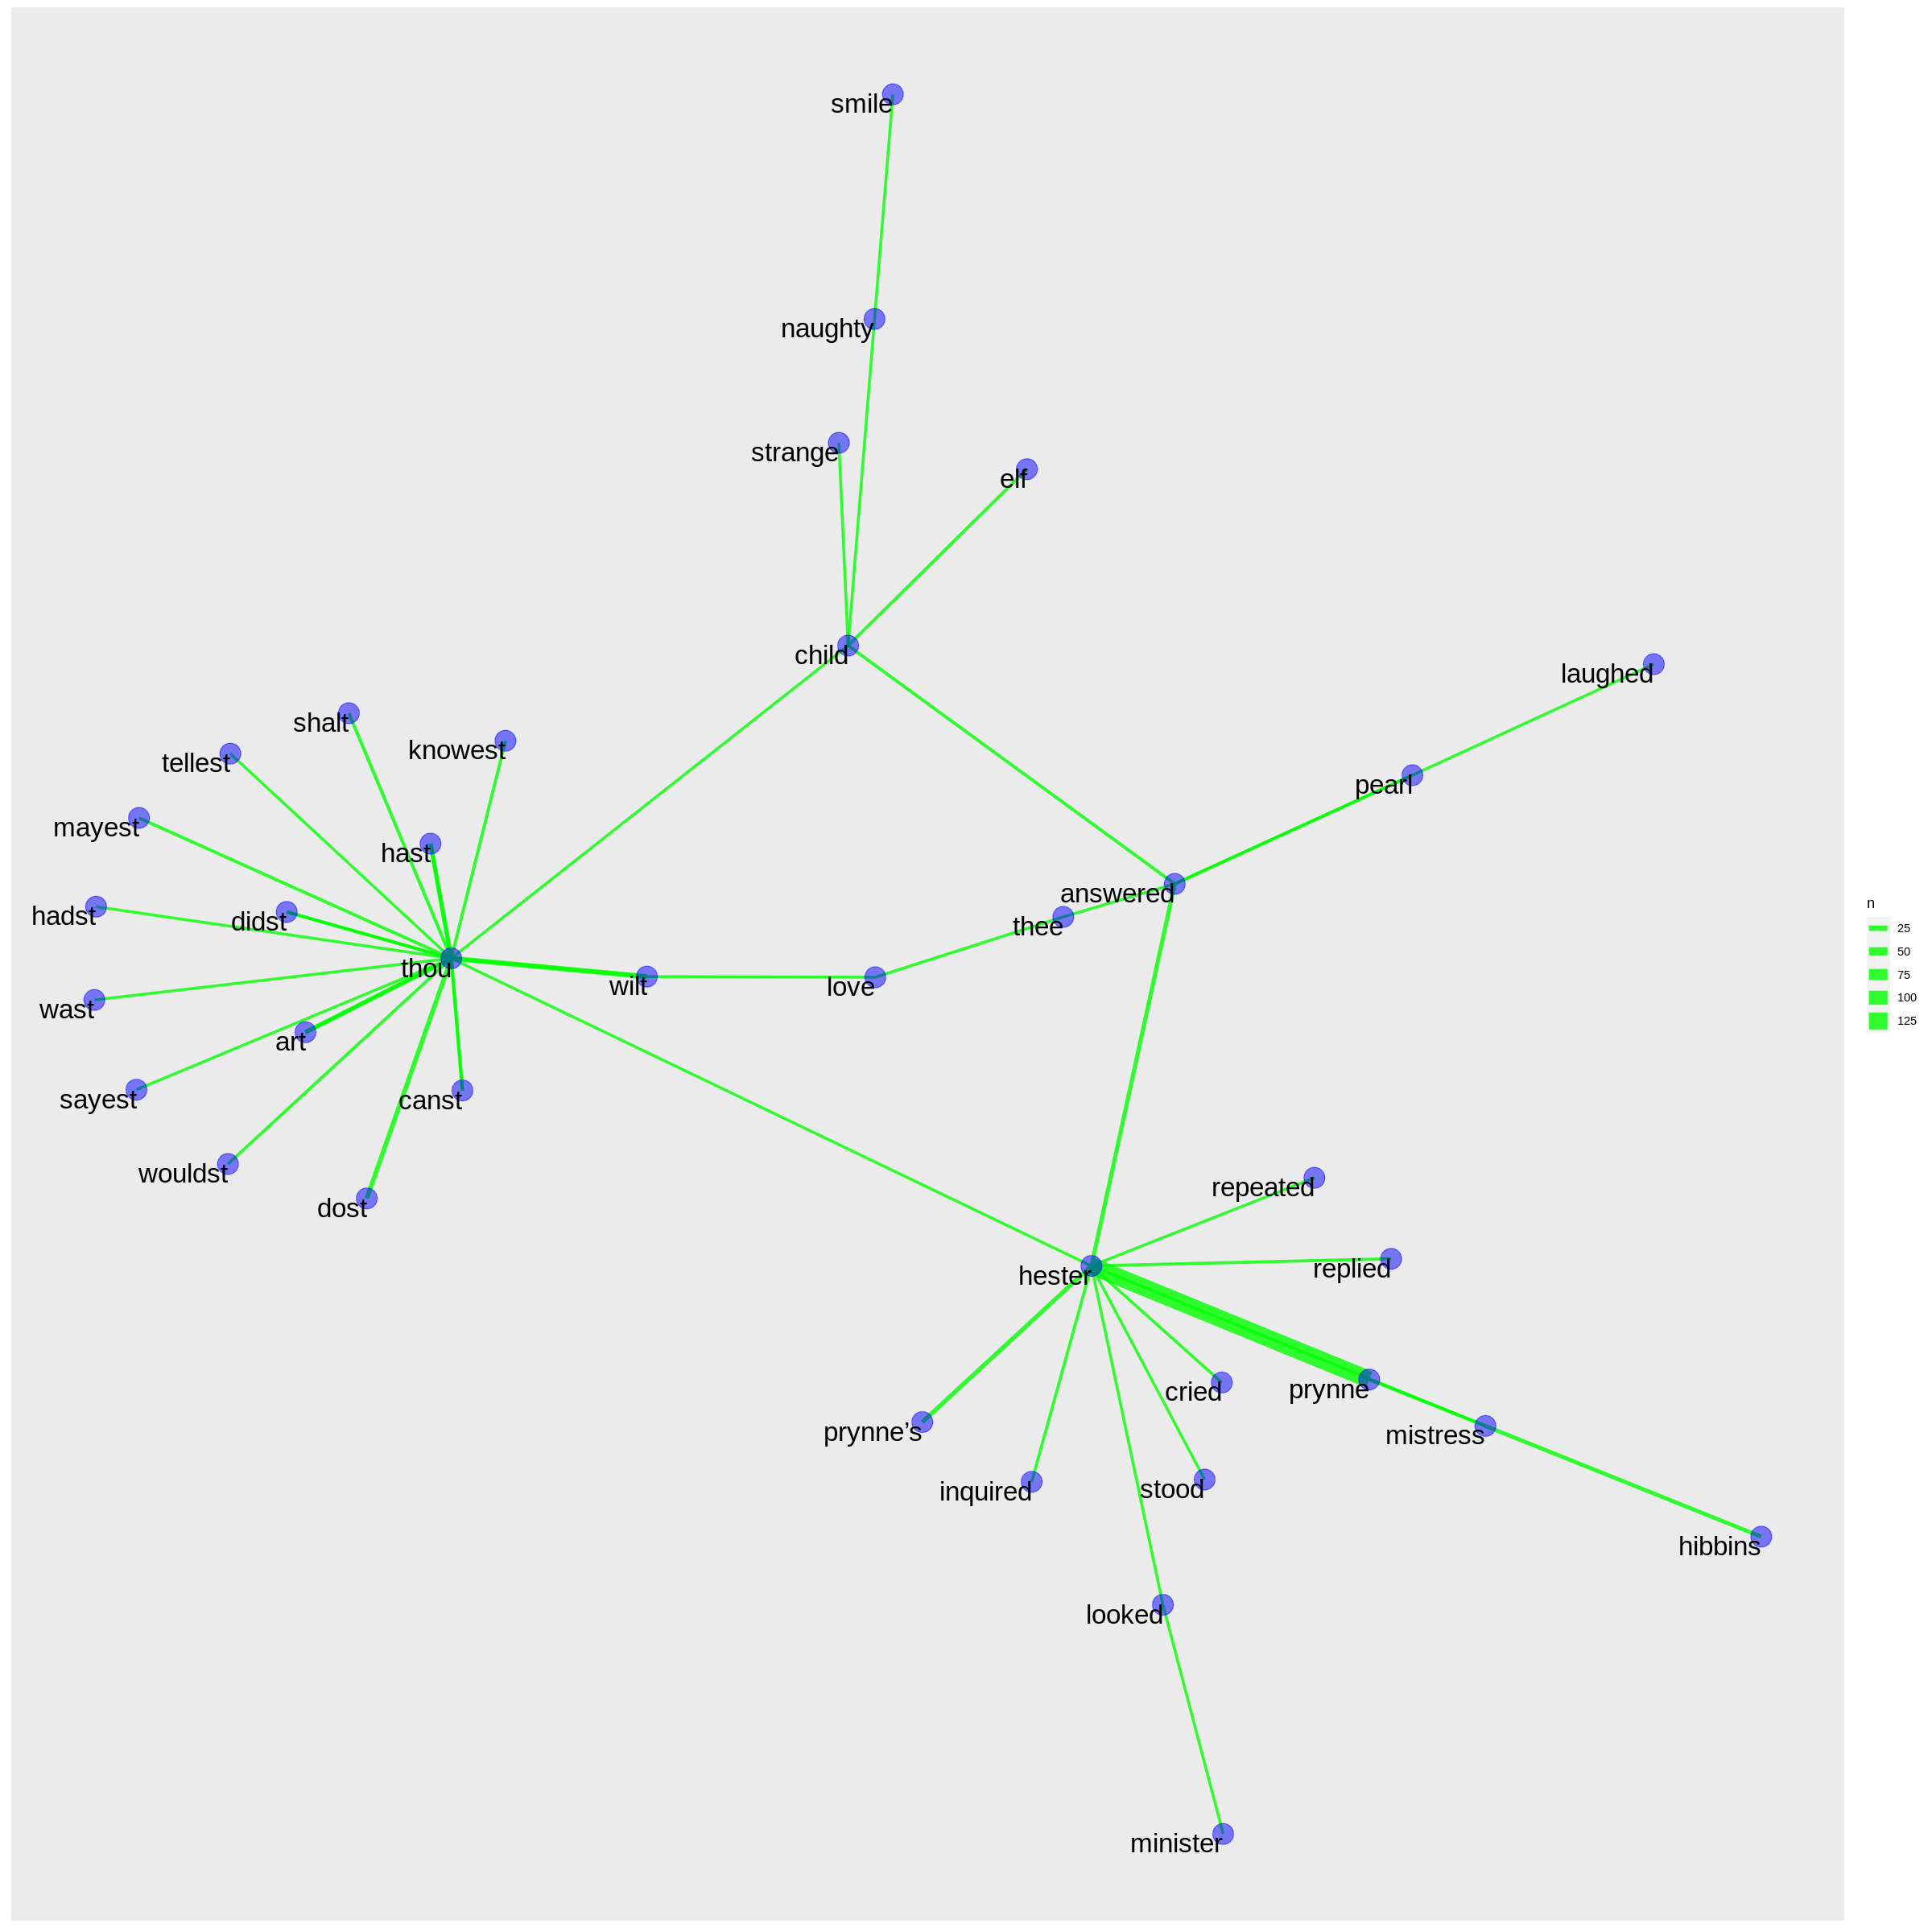

In [ ]:
ggraph(closeup, layout = "fr") + 
  geom_edge_link(alpha = 0.8, aes(width = n), color = "green") + # draw edges
  geom_node_point(alpha = 0.5, color = "blue", size = 7) +  # draw vertices
  geom_node_text(aes(label = name), vjust = 1, hjust = 1, size = 7) # add vertex labels